In [26]:
import tweepy                       #for live data set
from textblob import TextBlob       #text processing
import pandas as pd                 #for creating data frame
import numpy as np                  
import re                           #A regular expression (or RE) specifies a set of strings that matches it
import matplotlib.pyplot as pt      #used for plotting the graph

In [27]:
configure=pd.read_csv("C:\\Users\\nk4au\\OneDrive\\Desktop\\twitter\\configure.csv")    #loading the csv file that contains the keys generated by twitter developer account

In [3]:
#ACCESS TO THE KEYS 
twitterApiKey = configure['twitterApiKey'][0]
twitterApiSecretKey = configure['twitterApiSecretKey'][0]
twitterApiAccessToken=configure['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret=configure['twitterApiAccessTokenSecret'][0]

In [4]:
auth=tweepy.OAuthHandler(twitterApiKey,twitterApiSecretKey)
auth.set_access_token(twitterApiAccessToken,twitterApiAccessTokenSecret)
twitterApi = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
twitterAccount = input('Enter Twitter account to be analyzed: ')
print(twitterAccount)

Enter Twitter account to be analyzed: ShashiTharoor
ShashiTharoor


In [6]:
#VALIDATING TWITTER ACCOUNT ENTERED
tweets = tweepy.Cursor(twitterApi.user_timeline,
                      screen_name=twitterAccount,
                      count = None,
                      since_id = None,
                      max_id = None,trim_user = True,exclude_replies = True,contributor_details=False,
                      include_entities = False).items(50);

In [7]:
df = pd.DataFrame(data = [tweet.text for tweet in tweets],columns=['Tweet'])  #dataframe consisting of tweets of the user

Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities


In [8]:
df.head() #extracts top 5 tweets from the dataframe

,Tweet
0,RT @oheraldogoa: “I’d love rest of #India to b...
1,RT @AlephBookCo: @ShashiTharoor tells Ambedkar...
2,RT @AlephBookCo: '...I have approached the sub...
3,RT @shubhpilot: कुछ दिनों पहले नवभारत .@Navbha...
4,"RT @jameelsjam: “Reasons of State”,based on @S..."


In [9]:
#function to remove special characters
def cleaning_data(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'RT : ', '', txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt 

In [10]:
df['Tweet']=df['Tweet'].apply(cleaning_data)

In [11]:
#function for subjectivity
#generally refer to personal opinion, emotion or judgment whereas objective refers to factual information

def get_text(txt):
    return TextBlob(txt).sentiment.subjectivity

In [12]:
#function for polarity
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement

def get_text_polarity(txt):
    return TextBlob(txt).sentiment.polarity

In [13]:
df['Subjectivity']=df['Tweet'].apply(get_text)
df['Polarity']=df['Tweet'].apply(get_text_polarity)

In [14]:
df.head(50)  #extracts top 50 tweets

,Tweet,Subjectivity,Polarity
0,"“I’d love rest of India to be like Goa,” says ...",0.600000,0.500000
1,"tells Ambedkar’s story with great lucidity, i...",0.750000,0.800000
2,'...I have approached the subject of this shor...,0.316667,-0.083333
3,कुछ दिनों पहले नवभारत . के जी द्वारा जी की ल...,0.000000,0.000000
4,"“Reasons of State”,based on doctoral thesis a...",0.000000,0.000000
5,"As far as I am concerned, my programmes in Ker...",0.625000,-0.075000
6,I want a New India too. It would be a New Indi...,0.454545,0.136364
7,The first war of national independence of 1857...,0.333333,0.250000
8,Well said !,0.000000,0.000000
9,"On Lata, Rafi, Asha singing for national cause...",0.475000,0.350000


In [15]:
df=df.drop(df[df['Tweet']==''].index)

In [16]:
def textAnalysis(x):
    if x<0:
        return 'Negative'
    elif x==0:
        return 'Neutral'
    else:
        return 'Positive'

In [17]:
df['Type_of_Tweet']=df['Polarity'].apply(textAnalysis)

In [18]:
df.head(50)

,Tweet,Subjectivity,Polarity,Type_of_Tweet
0,"“I’d love rest of India to be like Goa,” says ...",0.600000,0.500000,Positive
1,"tells Ambedkar’s story with great lucidity, i...",0.750000,0.800000,Positive
2,'...I have approached the subject of this shor...,0.316667,-0.083333,Negative
3,कुछ दिनों पहले नवभारत . के जी द्वारा जी की ल...,0.000000,0.000000,Neutral
4,"“Reasons of State”,based on doctoral thesis a...",0.000000,0.000000,Neutral
5,"As far as I am concerned, my programmes in Ker...",0.625000,-0.075000,Negative
6,I want a New India too. It would be a New Indi...,0.454545,0.136364,Positive
7,The first war of national independence of 1857...,0.333333,0.250000,Positive
8,Well said !,0.000000,0.000000,Neutral
9,"On Lata, Rafi, Asha singing for national cause...",0.475000,0.350000,Positive


In [19]:
#calculation of positive tweets

positive=df[df['Type_of_Tweet']=='Positive']
print(str(positive.shape[0]/(df.shape[0])*100)+'% of positive Tweets')
pos=positive.shape[0]/df.shape[0]*100

44.0% of positive Tweets


In [20]:
#calculation of negative tweets

negative=df[df['Type_of_Tweet']=='Negative']
print(str(negative.shape[0]/(df.shape[0])*100)+'% of Negative Tweets')
neg=negative.shape[0]/df.shape[0]*100

10.0% of Negative Tweets


In [21]:
#calculation of neutral tweets

neutral=df[df['Type_of_Tweet']=='Neutral']
print(str(neutral.shape[0]/(df.shape[0])*100)+'% of Neutral Tweets')
neu=neutral.shape[0]/df.shape[0]*100

46.0% of Neutral Tweets


In [22]:
explode=(0,0.1,0)   #used to transform each element of a list to a row, replicating the index values
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neu]
colors=['yellow','red','violet']

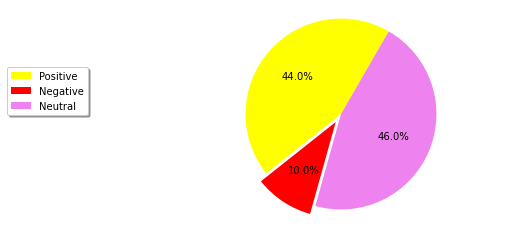

In [23]:
#CREATION OF PIE CHART
pt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=60)
pt.legend(labels,loc=(-0.5,0.5),shadow=True)
pt.axis('equal')
pt.savefig('Tweet_Analyzer.png')

<BarContainer object of 3 artists>

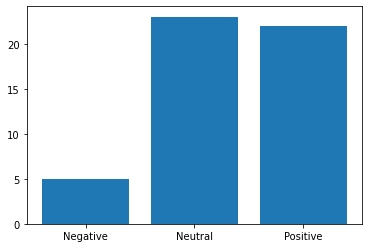

In [24]:
#CREATION OF BAR GRAPH
labels=df.groupby('Type_of_Tweet').count().index.values
values=df.groupby('Type_of_Tweet').size().values
pt.bar(labels,values)

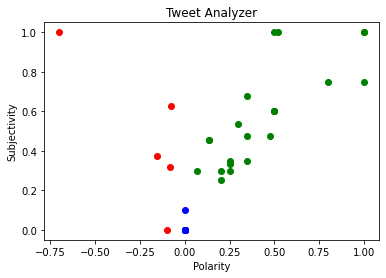

In [25]:
#RELATIONSHIP BETWEEN POLARITY AND SUBJECTIVITY
for index,row in df.iterrows():
    if row['Type_of_Tweet']=='Positive':
        pt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Type_of_Tweet']=='Negative':
        pt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    elif row['Type_of_Tweet']=='Neutral':
        pt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
pt.title('Tweet Analyzer')
pt.xlabel('Polarity')
pt.ylabel('Subjectivity')
pt.show()